# Assignment 4
## Gal Dali

### Question 1

### False Position Method Algorithm

1. Stretch a line from $f(a)$ to $f(b)$ and find the intersection with the $x$-axis. Call this intersection point as $x_1$.
2. If $f(x_1) = 0$ or $|f(x_1)| <= $ tolerance, return $x_1$ (we found the root with perfect/enough accuracy).
3. Else, if $\operatorname{sign}(f(x_1)) = \operatorname{sign}(f(a))$, the root lies in the interval $[x_1, b]$, so set $a = x_1$ and go back to step 1.
4. Else, if $\operatorname{sign}(f(x_1)) = \operatorname{sign}(f(b))$, the root lies in the interval $[a, x_1]$, so set $b = x_1$ and go back to step 1.


In [215]:
# Helper methods
get_slope_of_line = lambda x_1, x_2, f_x1, f_x2: (f_x2 - f_x1) / (x_2 - x_1)

# for some values of a and b, ((a + b) / 2) will cause an overflow.
# calculate the average of two numbers in a way that prevents overflow.
# if a > b, calculate (a - b) / 2 + b.
# if a < b, calculate (b - a) / 2 + a.
# if a = b, returns a.
# if a and b have different signs, calculate (a + b) / 2 as usual because there is no risk of overflow.
find_avg = lambda x_1, x_2: ((x_1 - x_2) / 2 + x_2) if x_1 > x_2 else ((x_2 - x_1) / 2 + x_1) if x_1 < x_2 else x_1

In [216]:
def f(x):
    return x ** 2 - 1 / 2

#### Recursive solution

In [217]:
def regula_falsi_recursive(f: callable, a: float, b: float, eps: float, max_iter: int, verbose: bool = False,
                           cur_iter: int = 0) -> tuple[float, int]:
    """
    :param f: the function to find the root of.
    :param a: the lower bound of the bracket.
    :param b: the upper bound of the bracket.
    :param eps: the accuracy tolerance.
    :param max_iter: maximum number of iterations.
    :param cur_iter: current iteration.
    :param verbose: whether to print the intermediate results.
    :return: the root of the function using the False Position Method & the number of iterations it ran.
    """
    if cur_iter >= max_iter:
        return a, (cur_iter + 1)

    fa = f(a)
    fb = f(b)

    # This condition is to avoid division by zero or numerical instability by dividing by a very small number; this is also another breaking condition of the recursion (the algorithm assumes a valid input for a and b - there is a root between them & b > a)
    if b - a <= eps:
        return a, cur_iter + 1

    # STEP 1:
    slope = get_slope_of_line(a, b, fa, fb)
    x1 = b - (fb / slope)

    # STEP 2:
    fx1 = f(x1)
    if verbose:
        print("Iteration:", cur_iter + 1, end=":\t")
        print(f"x1: {x1}, f(x1): {fx1}")
    if fx1 == 0 or abs(fx1) <= eps:
        return x1, cur_iter + 1

    # STEP 3:
    if fx1 * fa > 0:
        return regula_falsi_recursive(f, x1, b, eps, max_iter, verbose, cur_iter + 1)

    # STEP 4:
    if fx1 * fb > 0:
        return regula_falsi_recursive(f, a, x1, eps, max_iter, verbose, cur_iter + 1)


def call_regula_falsi_x_times \
                (f: callable, a: float, b: float, eps: float, max_iter: int, verbose: bool) -> tuple[float, int]:
    return regula_falsi_recursive(f, a, b, eps, max_iter, verbose)

#### Iterative solution

In [218]:
def regula_falsi_iterative(f: callable, a: float, b: float,
                           eps: float, max_iter: int, verbose: bool = False) -> tuple[float, int]:
    """
    :param f: the function to find the root of.
    :param a: the lower bound of the bracket.
    :param b: the upper bound of the bracket.
    :param eps: the accuracy tolerance.
    :param max_iter: maximum number of iterations.
    :param verbose: whether to print the intermediate results.
    :return: the root of the function using the False Position Method & the number of iterations it ran.
    """
    x1 = 0
    cur_iter = 0
    for cur_iter in range(max_iter):
        fa = f(a)
        fb = f(b)

        # This condition is to avoid division by zero or numerical instability by dividing by a very small number; this is also another breaking condition of the recursion (the algorithm assumes a valid input for a and b - there is a root between them & b > a)
        if b - a <= eps:
            return a, cur_iter + 1

        # STEP 1:
        slope = get_slope_of_line(a, b, fa, fb)
        x1 = b - (fb / slope)

        # STEP 2:
        fx1 = f(x1)
        if verbose:
            print("Iteration:", cur_iter + 1, end=":\t")
            print(f"x1: {x1}, f(x1): {fx1}")
        if fx1 == 0 or abs(fx1) <= eps:
            return x1, cur_iter + 1

        # STEP 3 & 4:
        if fx1 * fa > 0:
            a = x1
        elif fx1 * fb > 0:  # must be elif because I am only allowed to change one of the bounds at a time.
            b = x1
    return x1, cur_iter

#### Both solutions' output:

In [219]:
l = 0
h = 1
num_of_iterations = 4
is_verbose = True
tol = 1e-6

print("\033[1mRecursive solution:\033[0;0m")
call_regula_falsi_x_times(f, l, h, tol, num_of_iterations, is_verbose)

print("\n\033[1mIterative solution:\033[0;0m")
regula_falsi_iterative(f, l, h, tol, num_of_iterations, is_verbose)[0]
# The actual answer is 1/sqrt(2) which is roughly 0.707106781

Recursive solution:
Iteration: 1:	x1: 0.5, f(x1): -0.25
Iteration: 2:	x1: 0.6666666666666667, f(x1): -0.05555555555555547
Iteration: 3:	x1: 0.7, f(x1): -0.010000000000000064
Iteration: 4:	x1: 0.7058823529411764, f(x1): -0.0017301038062284557

Iterative solution:
Iteration: 1:	x1: 0.5, f(x1): -0.25
Iteration: 2:	x1: 0.6666666666666667, f(x1): -0.05555555555555547
Iteration: 3:	x1: 0.7, f(x1): -0.010000000000000064
Iteration: 4:	x1: 0.7058823529411764, f(x1): -0.0017301038062284557


0.7058823529411764

### Question 2

### Bisection Method

1. Define $x_1 = \frac{a + b}{2}$. The mid-point of the interval.
2. If $f(x_1) = 0$ or $|f(x_1)| <= $ tolerance, or $b - a <= $ tolerance, return $x_1$ (we found the root with perfect/enough accuracy).
3. Else, if $\operatorname{sign}(f(x_1)) = \operatorname{sign}(f(a))$, the root lies in the interval $[x_1, b]$, so set $a = x_1$ and go back to step 1.
4. Else, if $\operatorname{sign}(f(x_1)) = \operatorname{sign}(f(b))$, the root lies in the interval $[a, x_1]$, so set $b = x_1$ and go back to step 1.


#### Recursive solution

In [220]:
# The recursive solution has the downside of being limited by the maximum recursion depth of the system.
def bisection_recursive(f: callable, a: float, b: float, eps: float, max_iter: int, verbose: bool = False,
                        cur_iter: int = 0) -> tuple[float, int]:
    """
    :param f: the function to find the root of.
    :param a: the lower bound of the bracket.
    :param b: the upper bound of the bracket.
    :param eps: the accuracy tolerance.
    :param max_iter: maximum number of iterations.
    :param cur_iter: current iteration.
    :param verbose: whether to print the intermediate results.
    :return: the root of the function using the False Position Method.
    """
    if cur_iter >= max_iter:
        return a, (cur_iter + 1)

    fa = f(a)
    fb = f(b)

    # STEP 1:
    x1 = find_avg(b, a)

    # STEP 2:
    fx1 = f(x1)
    if verbose:
        print("Iteration:", cur_iter + 1, end=":\t")
        print(f"x1: {x1}, f(x1): {fx1}")
    if fx1 == 0 or b - a <= eps:
        return x1, cur_iter + 1

    # STEP 3:
    if fx1 * fa > 0:
        return bisection_recursive(f, x1, b, eps, max_iter, verbose, cur_iter + 1)

    # STEP 4:
    if fx1 * fb > 0:
        return bisection_recursive(f, a, x1, eps, max_iter, verbose, cur_iter + 1)


def call_bisection_x_times \
                (f: callable, a: float, b: float, eps: float, max_iter: int, verbose: bool) -> tuple[float, int]:
    return bisection_recursive(f, a, b, eps, max_iter, verbose)

#### Iterative solution

In [221]:
def bisection_iterative(f: callable, a: float, b: float,
                        eps: float, max_iter: int, verbose: bool = False) -> tuple[float, int]:
    """
    :param f: the function to find the root of.
    :param a: the lower bound of the bracket.
    :param b: the upper bound of the bracket.
    :param eps: the accuracy tolerance.
    :param max_iter: maximum number of iterations.
    :param verbose: whether to print the intermediate results.
    :return: the root of the function using the False Position Method.
    """
    x1 = 0
    cur_iter = 0
    for cur_iter in range(max_iter):
        fa = f(a)
        fb = f(b)

        # STEP 1:
        x1 = find_avg(b, a)

        # STEP 2:
        fx1 = f(x1)
        if verbose:
            print("Iteration:", cur_iter + 1, end=":\t")
            print(f"x1: {x1}, f(x1): {fx1}")
        if fx1 == 0 or b - a <= eps:
            return x1, cur_iter + 1

        # STEP 3 & 4:
        if fx1 * fa > 0:
            a = x1
        elif fx1 * fb > 0:  # must be elif because I am only allowed to change one of the bounds at a time.
            b = x1
    return x1, cur_iter

#### Both solutions' output:

In [222]:
l = 0
h = 1
num_of_iterations = 999
is_verbose = True
tol = 1e-10

print("\033[1mRecursive solution:\033[0;0m")
call_bisection_x_times(f, l, h, tol, num_of_iterations, is_verbose)

print("\n\033[1mIterative solution:\033[0;0m")
bisection_iterative(f, l, h, tol, num_of_iterations, is_verbose)
# The actual answer is 1/sqrt(2) which is roughly 0.707106781

Recursive solution:
Iteration: 1:	x1: 0.5, f(x1): -0.25
Iteration: 2:	x1: 0.75, f(x1): 0.0625
Iteration: 3:	x1: 0.625, f(x1): -0.109375
Iteration: 4:	x1: 0.6875, f(x1): -0.02734375
Iteration: 5:	x1: 0.71875, f(x1): 0.0166015625
Iteration: 6:	x1: 0.703125, f(x1): -0.005615234375
Iteration: 7:	x1: 0.7109375, f(x1): 0.00543212890625
Iteration: 8:	x1: 0.70703125, f(x1): -0.0001068115234375
Iteration: 9:	x1: 0.708984375, f(x1): 0.002658843994140625
Iteration: 10:	x1: 0.7080078125, f(x1): 0.0012750625610351562
Iteration: 11:	x1: 0.70751953125, f(x1): 0.0005838871002197266
Iteration: 12:	x1: 0.707275390625, f(x1): 0.0002384781837463379
Iteration: 13:	x1: 0.7071533203125, f(x1): 6.58184289932251e-05
Iteration: 14:	x1: 0.70709228515625, f(x1): -2.0500272512435913e-05
Iteration: 15:	x1: 0.707122802734375, f(x1): 2.2658146917819977e-05
Iteration: 16:	x1: 0.7071075439453125, f(x1): 1.078704372048378e-06
Iteration: 17:	x1: 0.7070999145507812, f(x1): -9.710842277854681e-06
Iteration: 18:	x1: 0.70710

(0.7071067811630201, 35)

#### Analytical calculation of run time

$ \text{The time complexity of the bisection method is } O(\log_2(\frac{b - a}{\text{tol}})) \text{ where } \text{tol} \text{ is the tolerance.} $
$ \text{From this, we inspect that the number of iterations we got: 35, is very close to the calculated value } \log_2(\frac{b - a}{\text{tol}}).$  
$ n = \log_2(\frac{1}{\text{tol}}) = \log_2(\frac{1}{{10^{-10}}}) \approx 33 \text{. Which is very close to 35.}$

### Question 3

### Newton-Raphson Method

1. Choose an initial guess $x_1$.
2. Calculate $\Delta x = -\frac{f(x_1)}{f'(x_1)} $.
3. Update $x_1 = x_1 + \Delta x$.
4. If $|x_1| <= $ tolerance, return $x_1$ (we found the root with perfect/enough accuracy).

#### Recursive solution

In [223]:
def newton_raphson_recursive(f: callable, f_prime: callable, x: float,
                             eps: float, n: int, verbose: bool = False, cur_iter: int = 0) -> tuple[float, int]:
    """
    :param f: the function to find the root of.
    :param f_prime: the derivative of the function.
    :param x: the initial guess.
    :param eps: the accuracy tolerance.
    :param n: number of iterations.
    :param cur_iter: current iteration.
    :param verbose: whether to print the intermediate results.
    :return: the root of the function using the Newton - Raphson Method.
    """
    if cur_iter >= n:
        return x, cur_iter
    del_x = -f(x) / f_prime(x)
    if verbose:
        print("Iteration:", cur_iter + 1, end=":\t")
        print(f"x: {x}, f(x): {f(x)}")
    return newton_raphson_recursive(f, f_prime, x + del_x, eps, n, verbose, cur_iter + 1)
    # if abs(del_x) <= eps:
    #     return x, (cur_iter + 1)

#### Iterative solution

In [224]:
def newton_raphson_iterative(f: callable, f_prime: callable, x: float,
                             eps: float, max_iter: int, verbose: bool = False) -> tuple[float, int]:
    """
    :param f: the function to find the root of. 
    :param f_prime: the derivative of the function.
    :param x: the initial guess.
    :param eps: the accuracy tolerance.
    :param max_iter: maximum number of iterations.
    :param verbose: whether to print the intermediate results.
    :return: the root of the function using the Newton-Raphson Method.
    """

    cur_iter = 0
    while cur_iter < max_iter:
        cur_iter += 1
        del_x = -f(x) / f_prime(x)
        x += del_x
        if verbose:
            print("Iteration:", cur_iter + 1, end=":\t")
            print(f"x: {x}, f(x): {f(x)}")
        # if abs(del_x) <= eps:
        #     return x, (cur_iter + 1)
    return x, (cur_iter + 1)

#### Plot the Newton-Raphson fractal for $z^4 - 1$

In [225]:
import numpy as np
import matplotlib.pyplot as plt


def func(z):
    return z ** 4 - 1


# derivative of the function
def func_prime(z):
    return 4 * z ** 3


# The roots of the function
roots = np.array([1.0, 1j, -1.0, -1j])

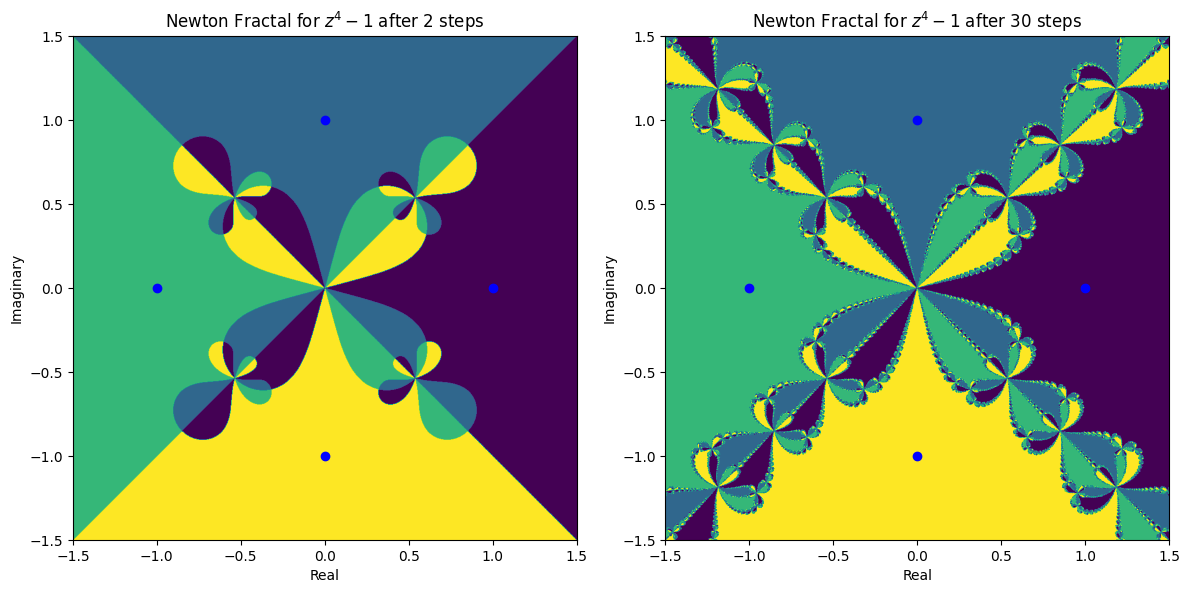

In [226]:
# number of steps for NR method:
num_steps = [2, 30]
# Create a figure with two subplots in the same row
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, step in zip(axes, num_steps):
    # Define the complex plane
    lim = [-1.5, 1.5]
    mesh = 1000
    x = np.linspace(lim[0], lim[1], mesh)
    plane = (x.reshape(1, mesh) + 1j * x.reshape(mesh, 1)).reshape(mesh, mesh, 1)

    # Run the algorithm
    NR_results = newton_raphson_iterative(func, func_prime, plane, 1e-10, step, verbose=False)[0]

    # Find the closest root to each point, and label it for color
    r = np.argmin(np.abs(roots - NR_results), axis=2)

    # Show the fractal
    ax.imshow(r, extent=(lim[0], lim[1], lim[0], lim[1]), origin='lower', cmap='viridis')
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.set_title(r'Newton Fractal for $z^4-1$ ' + f'after {step} steps')
    ax.plot(np.real(roots), np.imag(roots), 'o', color='blue')

# Adjust the layout and show the figure
plt.tight_layout()
plt.show()